In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline


C:\Users\pulkit.goel\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
df = pd.read_csv(r'C:\Users\pulkit.goel\Desktop\HR_Data.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [16]:
# Data Exploration and Visualization
left = df[df.left == 1]
left.shape



(3571, 10)

In [17]:
retained = df[df.left == 0]
retained.shape

(11428, 10)

In [18]:
# Average number of all columns
df.groupby('left').mean()

# Here impact of Satisfaction_level, saverage_monthly hours and promotion in last 5 years are key factors

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


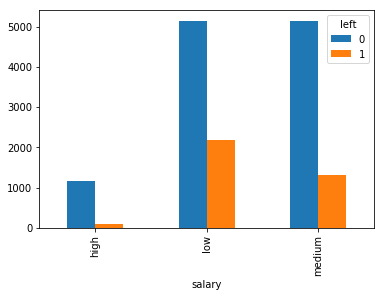

In [20]:
pd.crosstab(df.salary,df.left).plot(kind= 'bar')

In [22]:

subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years', 'salary' ]]

subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [24]:
salary_dummies = pd.get_dummies(subdf.salary, prefix = 'salary')
df_with_dummies = pd.concat([subdf, salary_dummies], axis= 'columns')
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [25]:
df_with_dummies.drop('salary', axis='columns', inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [26]:
y = df.left


In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_with_dummies,y,train_size = 0.7)
print(X_train.shape)
print(X_test.shape)

(10499, 6)
(4500, 6)


In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\pulkit.goel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
model.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [36]:
# Model Accuracy from prediction and original values


model.score(X_test,y_test)

0.7704444444444445